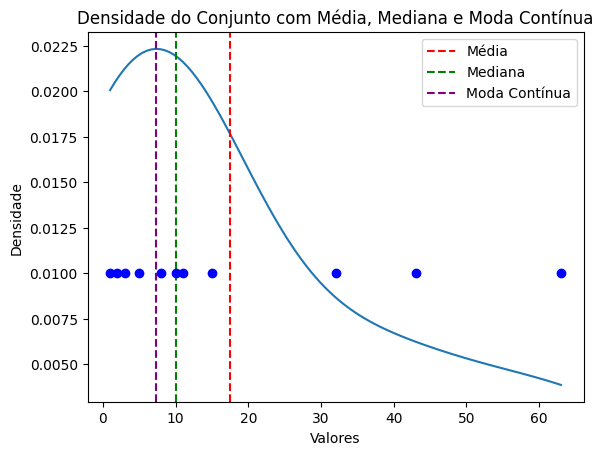

Média: 17.545454545454547
Mediana: 10.0
Moda Contínua: 7.262626262626263


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Criando o array
Xi = np.array([1, 10, 3, 15, 2, 32, 43, 5, 63, 8, 11])

# Calculando a média
media = np.mean(Xi)

# Calculando a mediana
mediana = np.median(Xi)

# Calculando a moda contínua (usando KDE - Kernel Density Estimation)
kernel = stats.gaussian_kde(Xi)
x_range = np.linspace(Xi.min(), Xi.max(), 100)
densidade = kernel(x_range)
moda_continua = x_range[np.argmax(densidade)]

# Plotando o gráfico da densidade com as medidas
plt.plot(x_range, densidade)
plt.axvline(media, color='red', linestyle='--', label='Média')
plt.axvline(mediana, color='green', linestyle='--', label='Mediana')
plt.axvline(moda_continua, color='purple', linestyle='--', label='Moda Contínua')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.title('Densidade do Conjunto com Média, Mediana e Moda Contínua')
plt.legend()

# Plotando os valores de Xi próximos ao eixo x
for x in Xi:
  plt.plot(x, 0.01, 'bo')  # 'ko' plota pontos pretos ('k') como círculos ('o')

plt.show()

# Imprimindo os resultados
print("Média:", media)
print("Mediana:", mediana)
print("Moda Contínua:", moda_continua)


# Estatística Descritiva - Estudo de Caso

## Desastre ambiental em Mariana

No dia 5 de novembro de 2015, a barragem de Fundão localizada em Mariana- MG, que armazenava os rejeitos do tratamento de minério de ferro da empresa Samarco Mineração S. A. rompeu. O evento foi classificado de acordo com o Governo do Estado de Minas Gerais como o maior desastre ambiental do Brasil.

Nosso estudo de caso proposto, irá contemplar diversas atividades que visam investigar, a partir do dados de monitoramente contínuo do Instituto Mineiro de Gestão das Águas ([IGAM](https://portalinfohidro.igam.mg.gov.br/monitoramento-de-qualidade-das-aguas)) , como a concentrações de metais e parâmetros de qualidade da água do Rio Doce estão evoluindo após o rompimento da barragem.

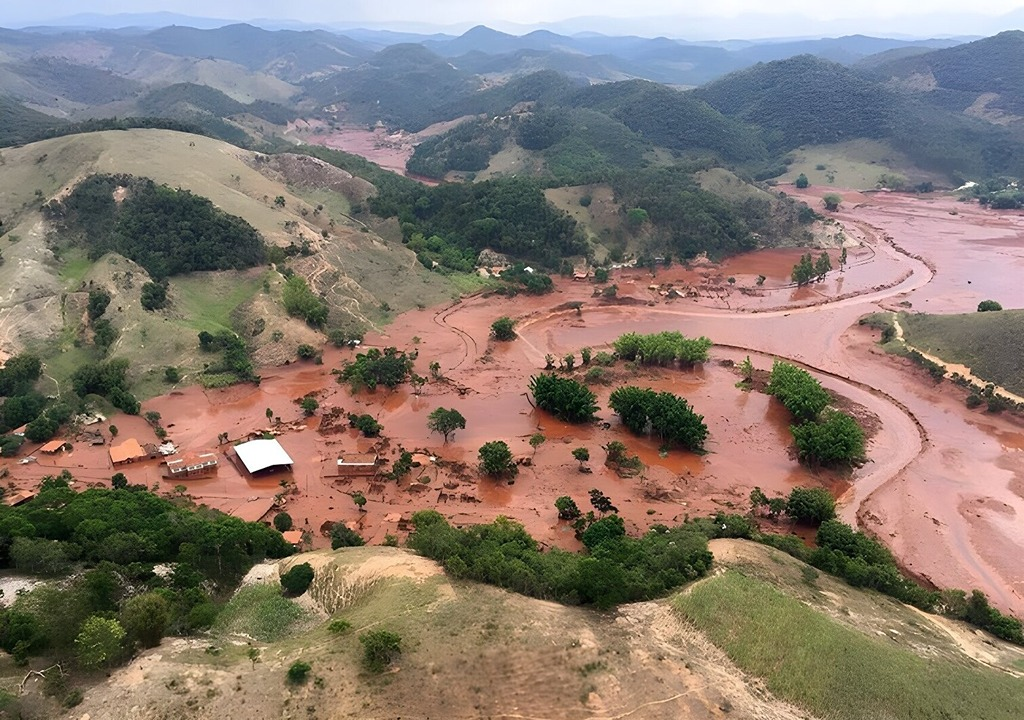

Vale ressaltar também o papel do IGAM, este que desempenha um papel crucial ao **disponibilizar dados transparentes sobre a gestão dos recursos hídricos em Minas Gerais**. Essa transparência não apenas informa e envolve a comunidade, mas também embasa políticas governamentais e decisões estratégicas, sendo essencial para enfrentar desafios relacionados à água, como escassez e poluição.

Para essa atividade, selecionou-se o **manganês como metal de interesse, em sua fração total, e a turbidez, como parâmetro de qualidade da água.**

Com o intuito de incentivar a realização dessa atividade, existem estudos que indicam que crianças expostas ao manganês através do consumo de água potável demonstraram deficiências intelectuais. Além disso, há pesquisas que relatam a ocorrência de distúrbios psiquiátricos graves em mineiros chilenos que foram intoxicados por esse metal. Quanto ao parâmetro de turbidez, sua seleção se deu devido à sua utilidade prática e indicativa na avaliação da qualidade da água, que foi significativamente prejudicada devido ao incidente de rompimento, portanto o uso desses dadados é de total importância para entender o impácto desse desastre.

Desta forma, através da análise de dados de monitoramento (como as concentrações de resíduos, metais, parâmetros de qualidades e entre outros), iremos responder algumas questões através de um estudo de caso visando mostrar como a estatística consegue trazer respostas e soluções para essa problemática, para termos ideia, abaixo há um mapa mostrando os danos e os pontos que iremos visualizar através dos dados.

In [5]:
import pandas as pd

# Primeiro definimos como variável o link do arquivo. Utilizamos no final do link raw=true para ele baixar o arquivo
file_url = 'https://github.com/Radagast1877/EstatisticaAplicadaEmR/blob/main/analitos_join.csv?raw=true'

# Baixamos o arquivo para a pasta local. !wget é a função (-O significa diretamente no disco)
!wget -O "/content/analitos_join.csv" $file_url

# Agora usamos a biblioteca que instalamos. A ordem é (nome da biblioteca.função que vai executar)
result = pd.read_csv('/content/analitos_join.csv')

# Extraímos do dataframe o objeto. Como no caso não há nehum objeto, definimos como "None"
df = result

# Mosatrando o começo do dataframe
df

--2025-02-24 05:22:05--  https://github.com/Radagast1877/EstatisticaAplicadaEmR/blob/main/analitos_join.csv?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Radagast1877/EstatisticaAplicadaEmR/raw/refs/heads/main/analitos_join.csv [following]
--2025-02-24 05:22:05--  https://github.com/Radagast1877/EstatisticaAplicadaEmR/raw/refs/heads/main/analitos_join.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Radagast1877/EstatisticaAplicadaEmR/refs/heads/main/analitos_join.csv [following]
--2025-02-24 05:22:05--  https://raw.githubusercontent.com/Radagast1877/EstatisticaAplicadaEmR/refs/heads/main/analitos_join.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connec

,data,ponto,manganes_total,turbidez,periodo,rompimento,ferro_dissolvido,intervalo
0,2012-01-17 10:30:00,RD071,1.654600,68.2,Chuvoso,Antes,0.114400,NaN
1,2012-01-20 10:25:00,RD035,0.345000,73.8,Chuvoso,Antes,0.457000,2 days 23:55:00
2,2012-01-26 16:25:00,RD045,0.109900,21.4,Chuvoso,Antes,0.288000,6 days 06:00:00
3,2012-01-29 17:55:00,RD067,0.084500,38.3,Chuvoso,Antes,0.225000,3 days 01:30:00
4,2012-04-03 11:30:00,RD071,0.824000,82.9,Estiagem,Antes,0.102000,64 days 17:35:00
...,...,...,...,...,...,...,...,...
430,2021-12-07 13:00:00,RD011,0.699094,128.0,Chuvoso,Depois,0.243258,NaN
431,2021-12-07 13:40:00,RD071,0.575674,84.1,Chuvoso,Depois,0.226735,NaN
432,2021-12-08 14:40:00,RD035,0.423265,260.0,Chuvoso,Depois,0.350582,NaN
433,2021-12-09 12:30:00,RD045,0.129835,192.0,Chuvoso,Depois,0.461261,NaN


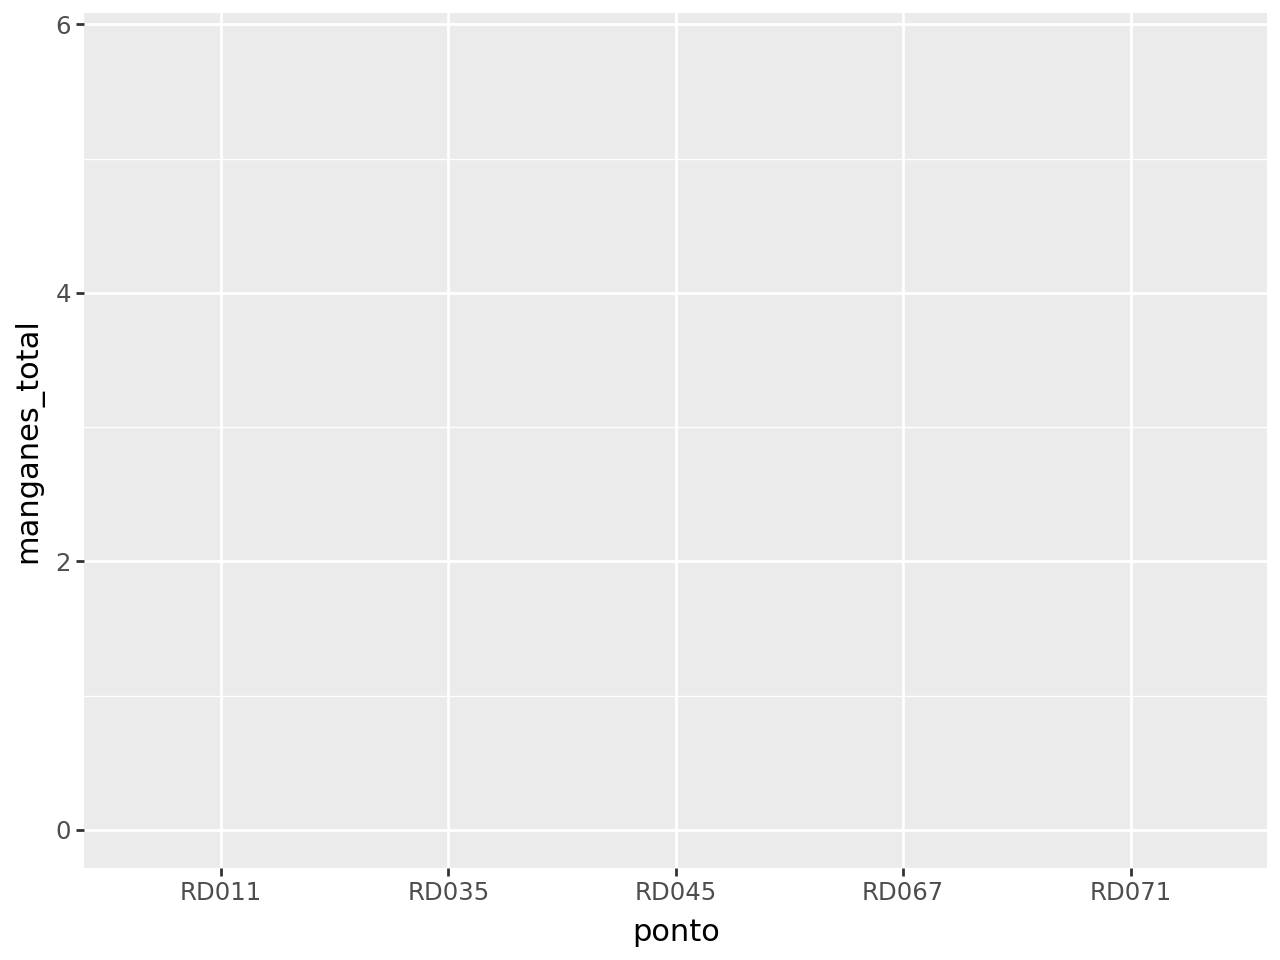

In [6]:
from plotnine import *
# O Plotnine é uma biblioteca que permite executar as funções do Gplot2 no Python.
# Quando utilizamos a sintaxe: from "biblioteca" import *. Estamos importando todas as funções da biblioteca.
# Essa biblioteca é interessante para Análise Exploratória de Dados
# Você vai "montando os gráficos em camadas"

ggplot(df, aes(x='ponto', y='manganes_total')) #A sintaxe é a mesma utilizada no R.

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 92 rows containing non-finite values.


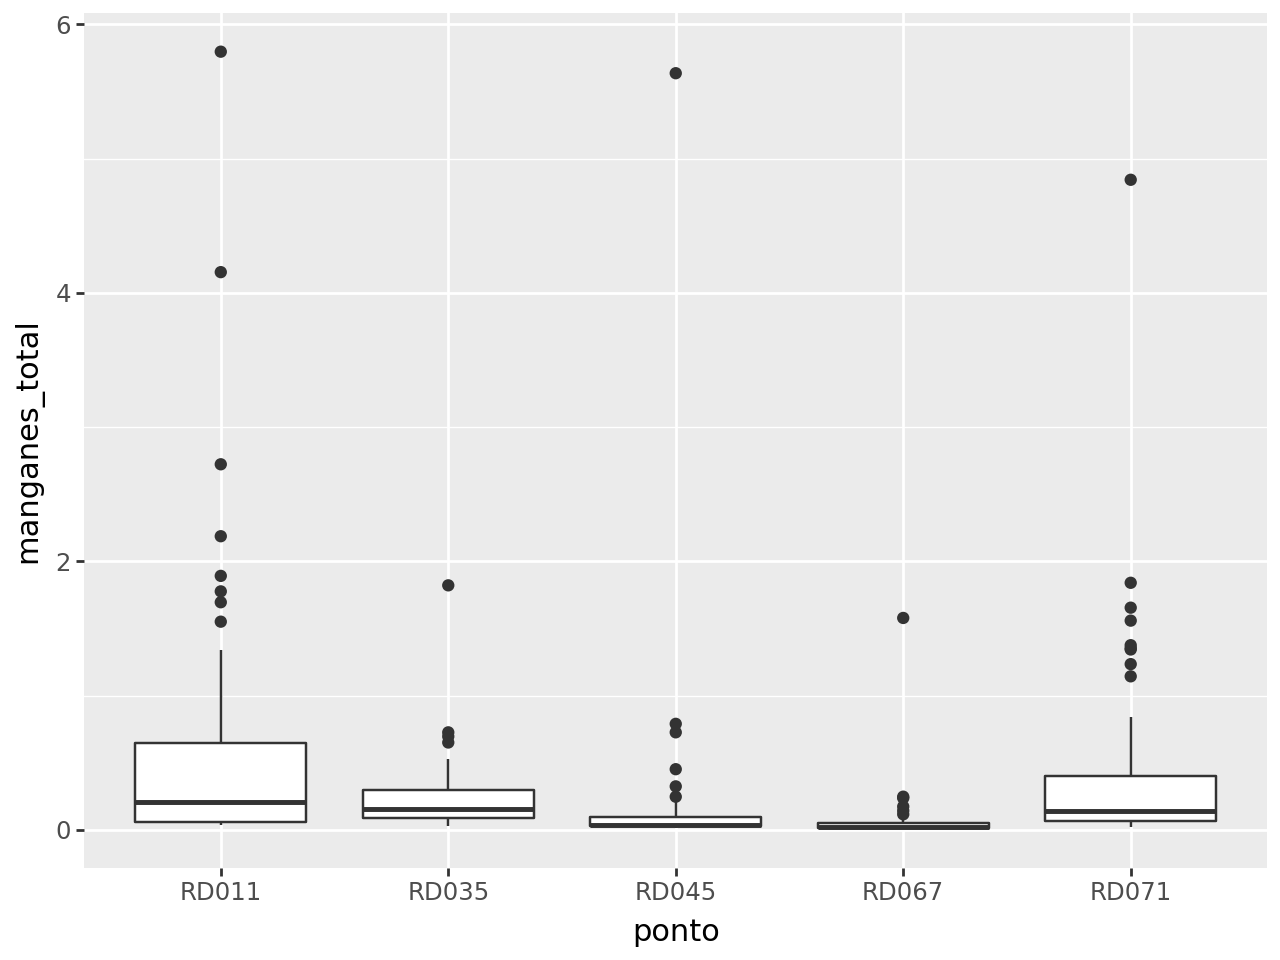

In [7]:
(ggplot(df, aes(x='ponto', y='manganes_total')) +
 geom_boxplot() +
 print())

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 92 rows containing non-finite values.


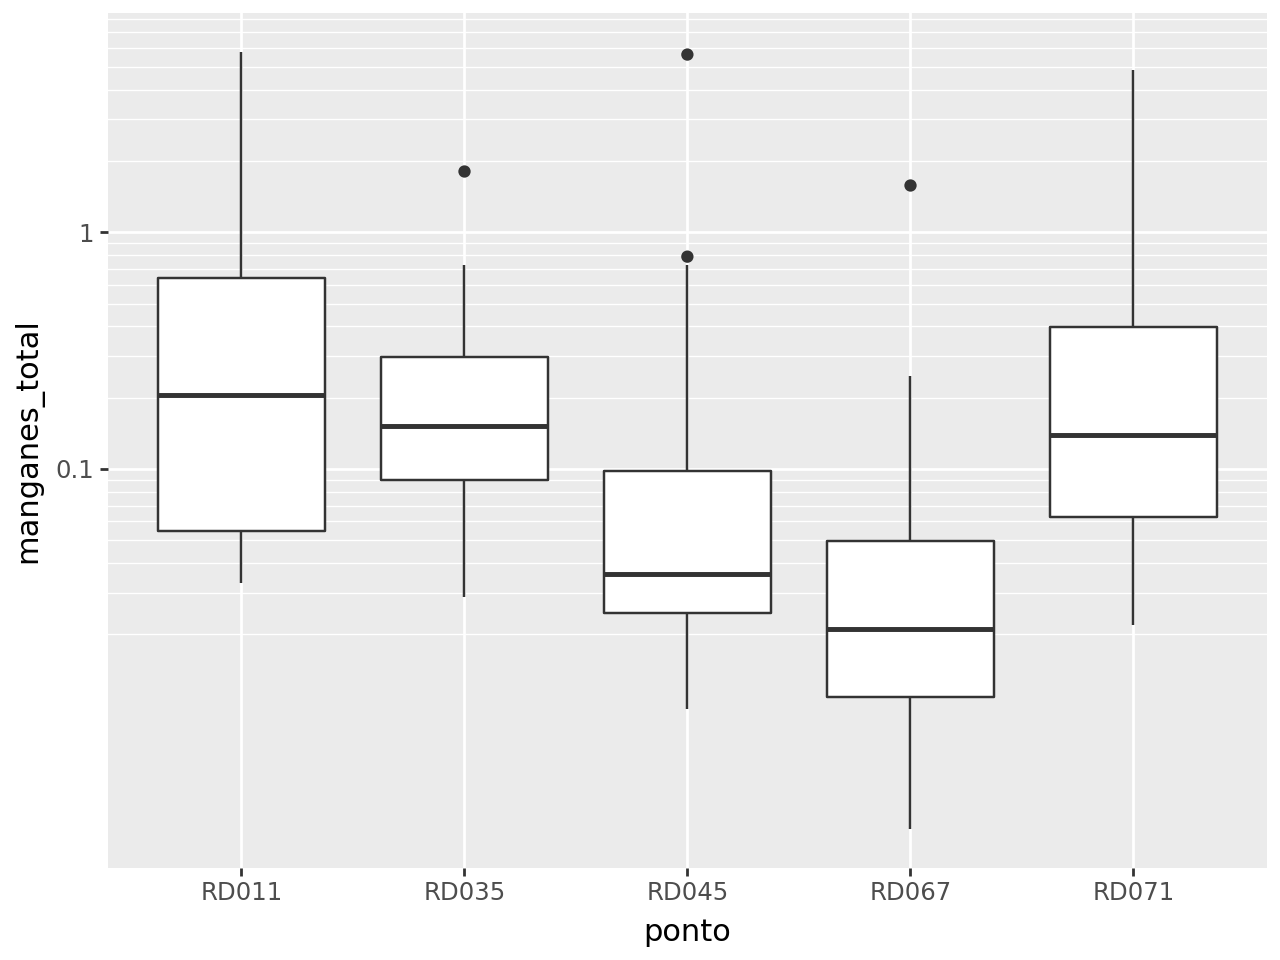

In [8]:
(ggplot(df, aes(x= 'ponto', y= 'manganes_total'))+
  geom_boxplot()+scale_y_log10(breaks=[0.1,1,10,100,1000,10000]) +
 print())

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 92 rows containing non-finite values.


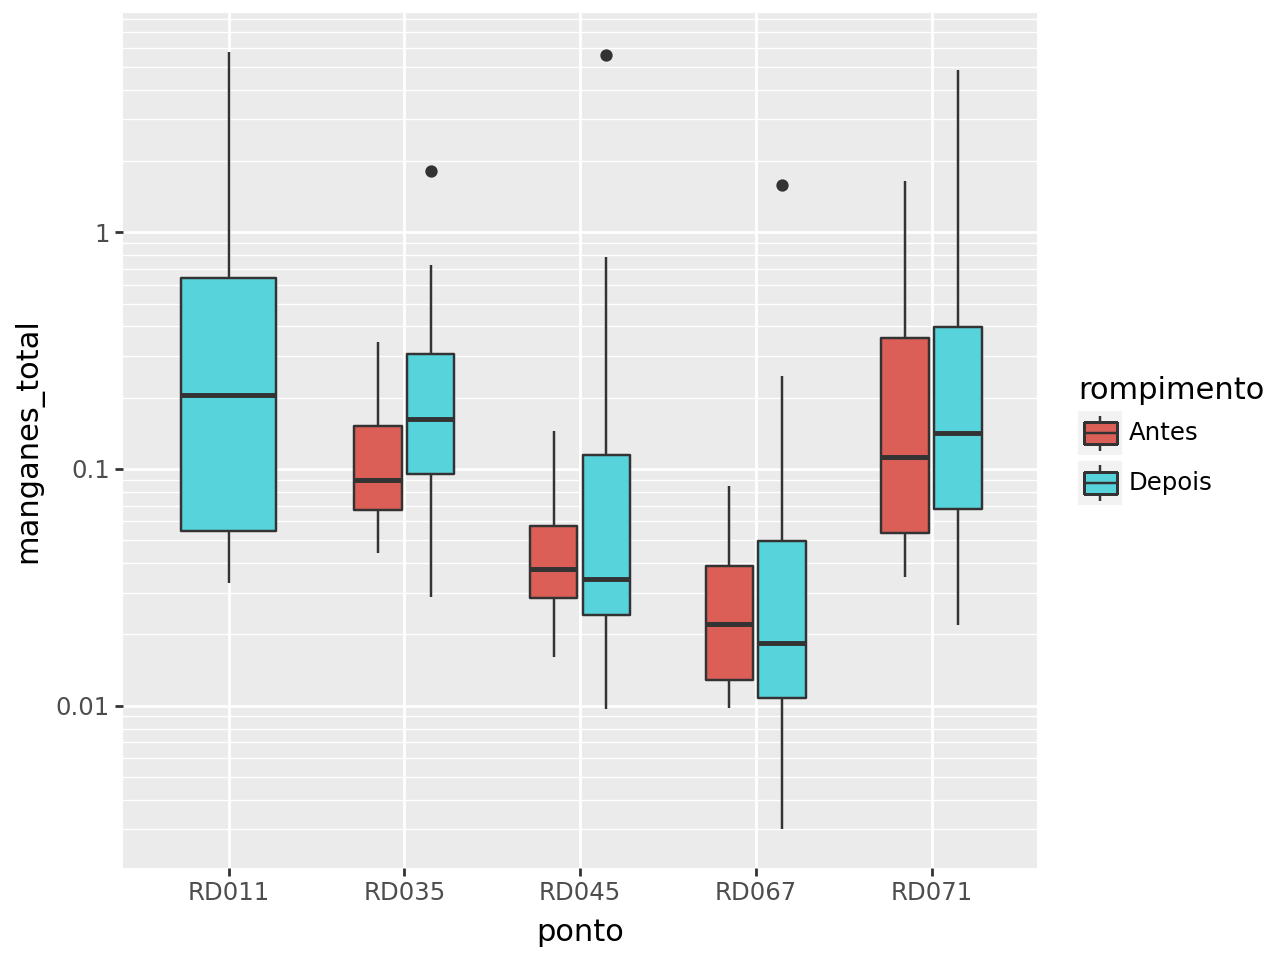

In [9]:
(ggplot(df, aes(x= 'ponto', y= 'manganes_total'))+
  geom_boxplot(aes(fill='rompimento'),width = 0.6)+scale_y_log10() +
 print())


/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 92 rows containing non-finite values.


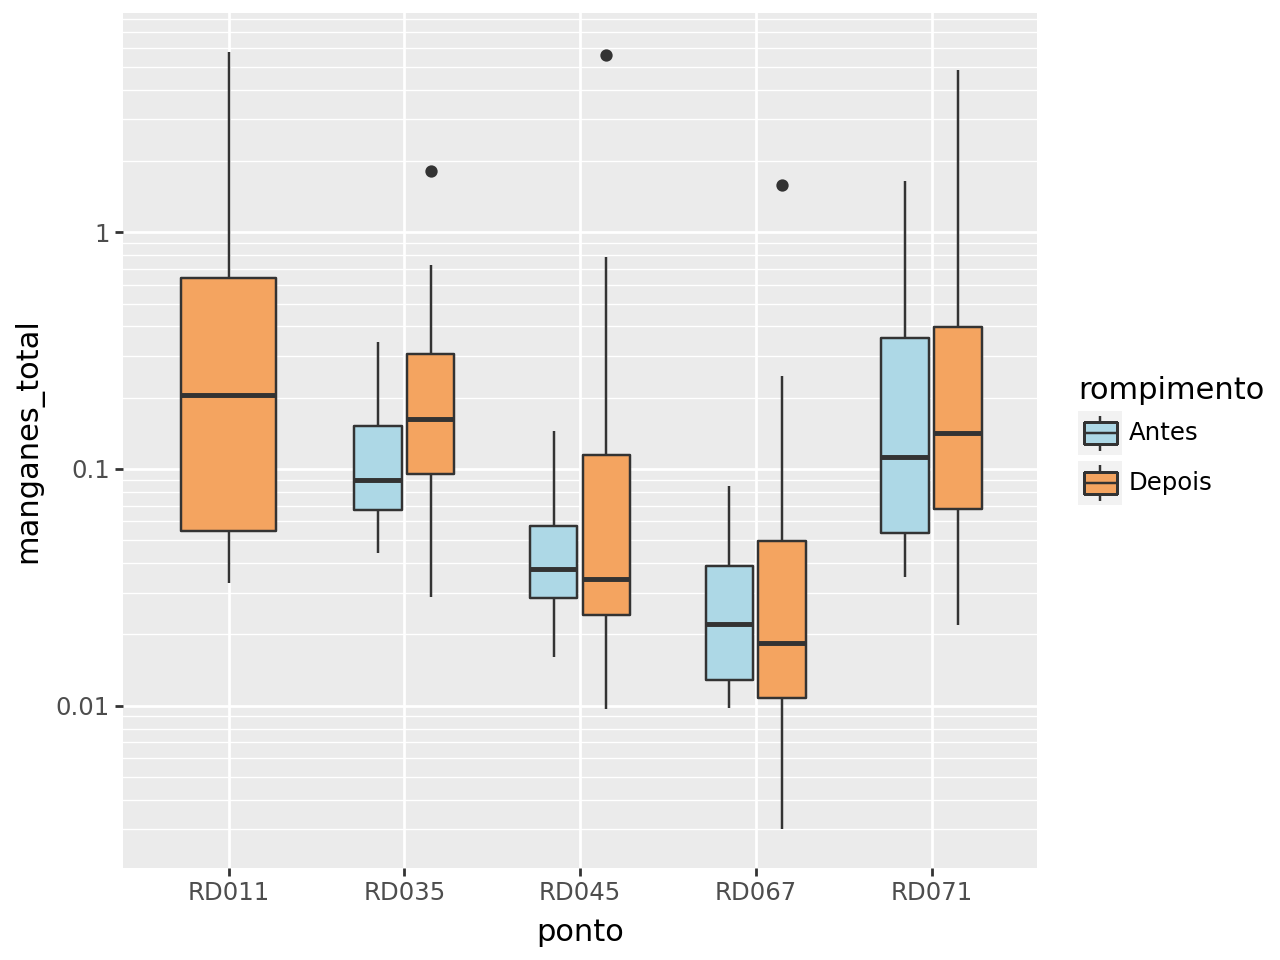

In [10]:
# Aqui temos uma artifício interessante. Em Python, cores são referenciadas apenas pelo seu código em Hexadecimal.
# Porém, podemos utilizar a função "to_hex" do 'Matplotlib' para transformarmos o nome da cor em Hexadecimal
# Primeiro importamos essa função da biblioteca

from matplotlib.colors import to_hex

# Convertendo nomes de cores para códigos hexadecimais através das variáveis cor1 e cor2
cor1 = to_hex('lightblue')
cor2 = to_hex('sandybrown')
# Você pode testar trocando o nome das cores

# Continua o mesmo código, mas agora adicionando cores.
(ggplot(df, aes(x='ponto', y='manganes_total')) +
  geom_boxplot(aes(fill='rompimento'), width = 0.6) +
  scale_y_log10() +
  scale_fill_manual(values={'Antes': cor1, 'Depois': cor2}))

# A única mudança em, relação ao R, neste caso é a atribuição de valores:
# values = {} sem a necessidade de values=c
# E novamente os valores sempre referenciados com ''

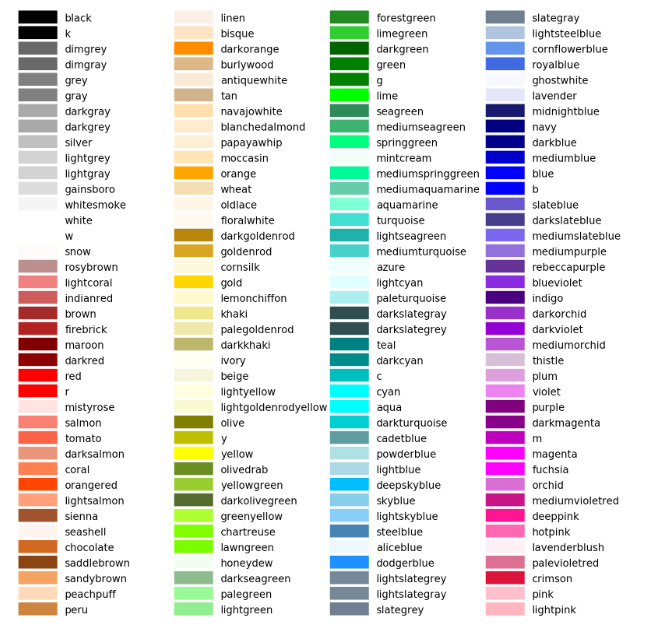

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 92 rows containing non-finite values.


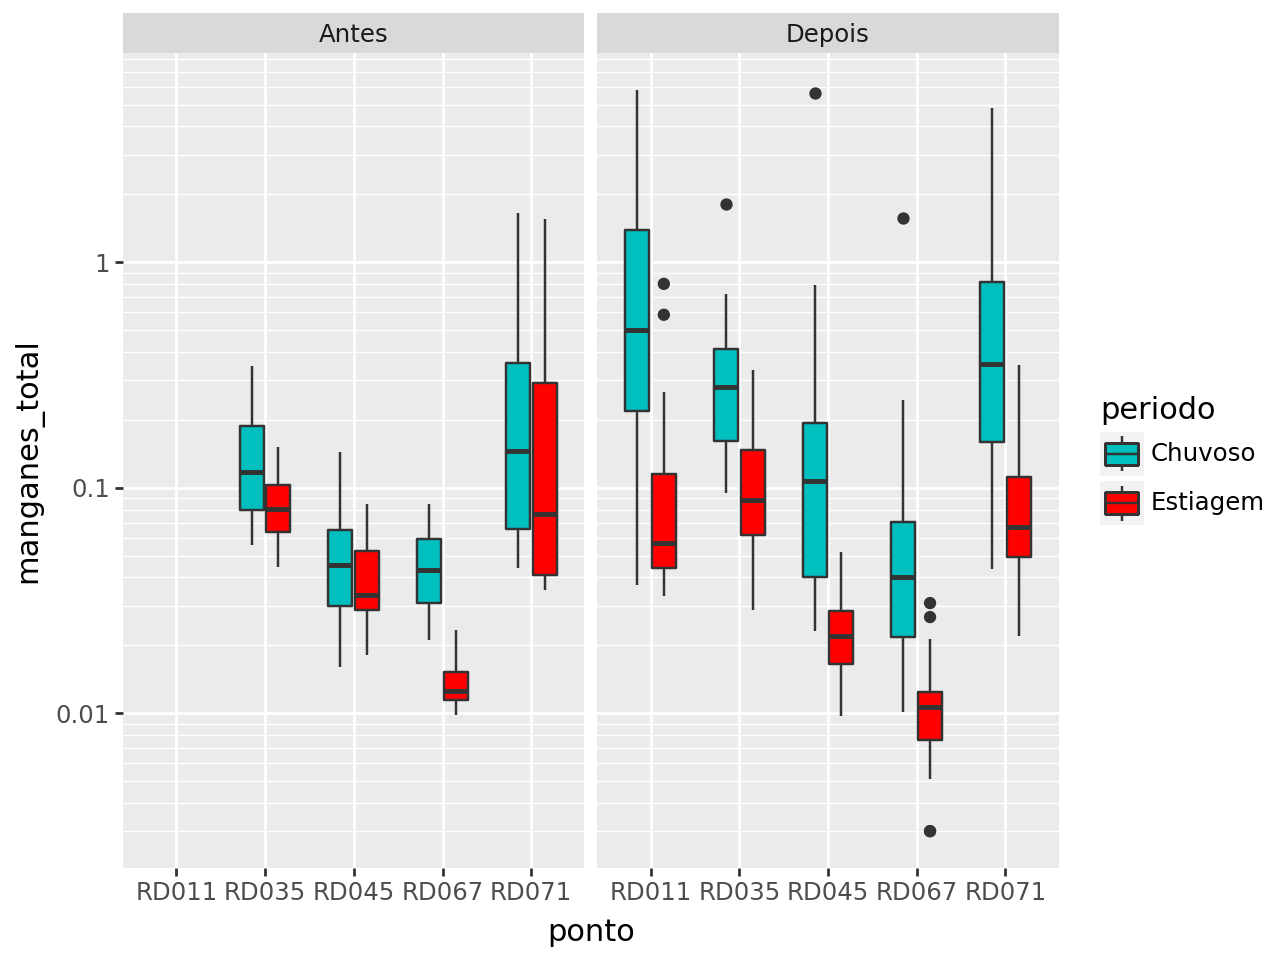

In [11]:
cor3 = to_hex('c') #como na tabela, "c", "r", "y" etc. são outras maneiras de referenciar cores
cor4 = to_hex('r')

(ggplot(df, aes(x='ponto', y='manganes_total')) +
  geom_boxplot(aes(fill='periodo'), width = 0.6) +
  scale_y_log10() +
  scale_fill_manual(values={'Chuvoso': cor3, 'Estiagem': cor4}) +
  # scale_fill_manual(values={'Antes': cor1, 'Depois': cor2}) +
  facet_wrap('~rompimento'))

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 92 rows containing non-finite values.


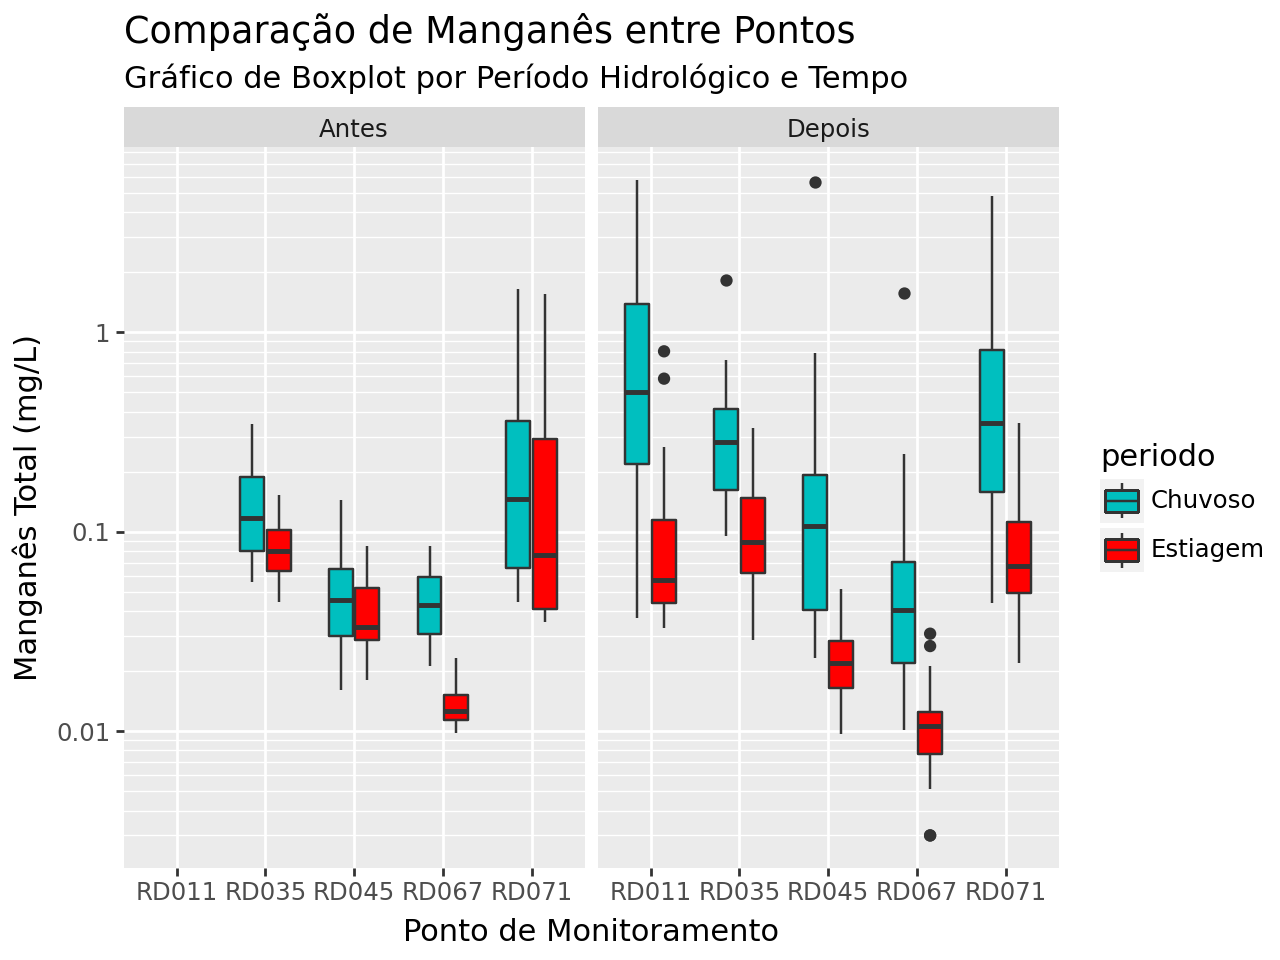

In [12]:
(ggplot(df, aes(x='ponto', y='manganes_total')) +
  geom_boxplot(aes(fill='periodo'), width = 0.6) +
  scale_y_log10() +
  scale_fill_manual(values={'Chuvoso': cor3, 'Estiagem': cor4}) +
#  scale_fill_manual(values={'Antes': cor1, 'Depois': cor2}) +
  facet_wrap('~rompimento') +
  labs(x='Ponto de Monitoramento',y='Manganês Total (mg/L)',
       title = 'Comparação de Manganês entre Pontos',
       subtitle = 'Gráfico de Boxplot por Período Hidrológico e Tempo'))

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 92 rows containing non-finite values.


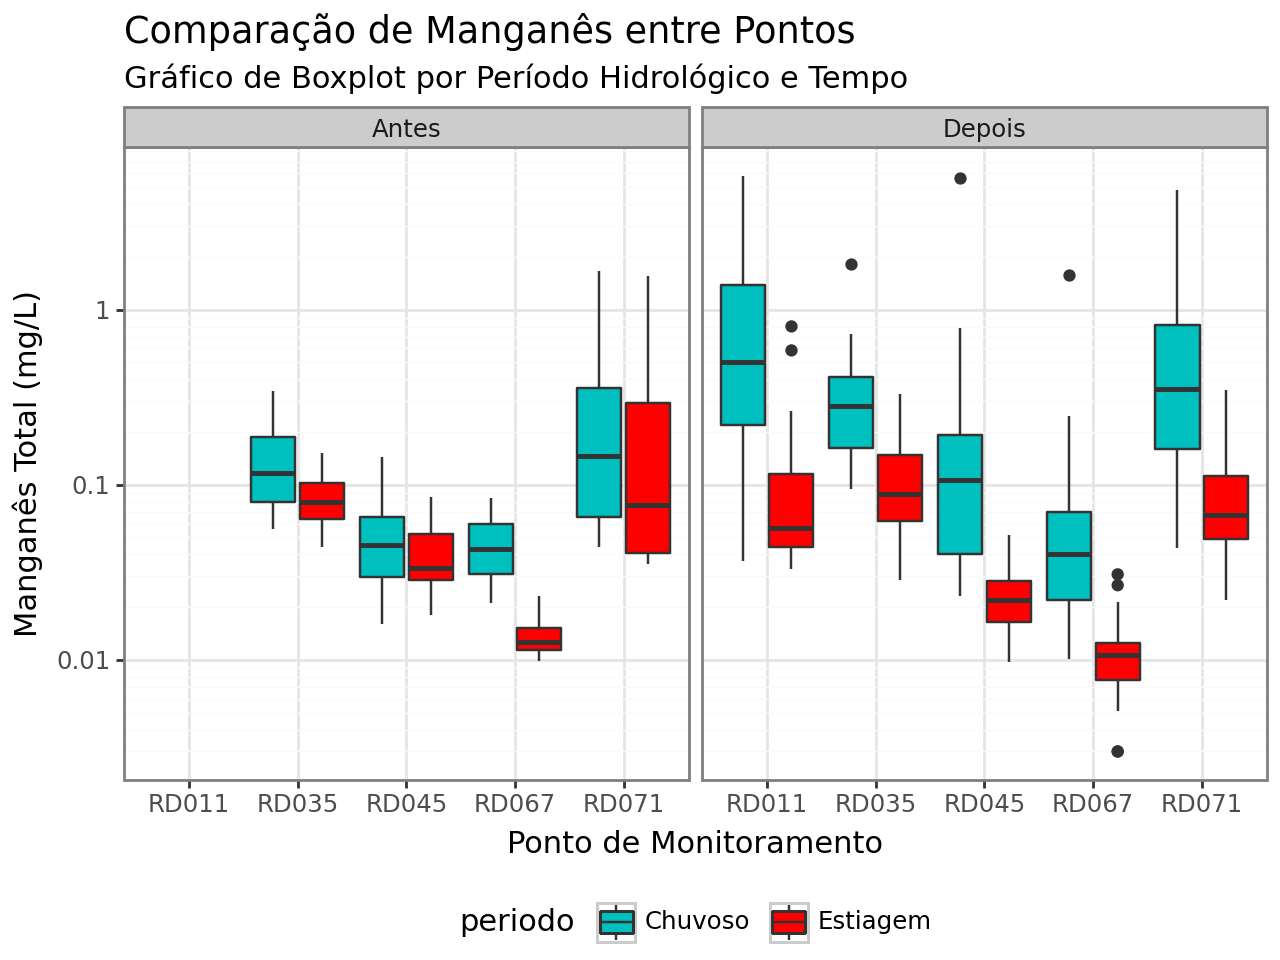

In [13]:
(ggplot(df, aes(x='ponto', y='manganes_total')) +
  geom_boxplot(aes(fill='periodo'), width = 0.9) +
  scale_y_log10() +
  scale_fill_manual(values={'Chuvoso': cor3, 'Estiagem': cor4}) +
 # scale_fill_manual(values={'Antes': cor1, 'Depois': cor2}) +
  facet_wrap('~rompimento') +
  labs(x='Ponto de Monitoramento',y='Manganês Total (mg/L)',
       title = 'Comparação de Manganês entre Pontos',
       subtitle = 'Gráfico de Boxplot por Período Hidrológico e Tempo')+
  theme_bw() +
  theme(legend_position='bottom'))

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 92 rows containing non-finite values.


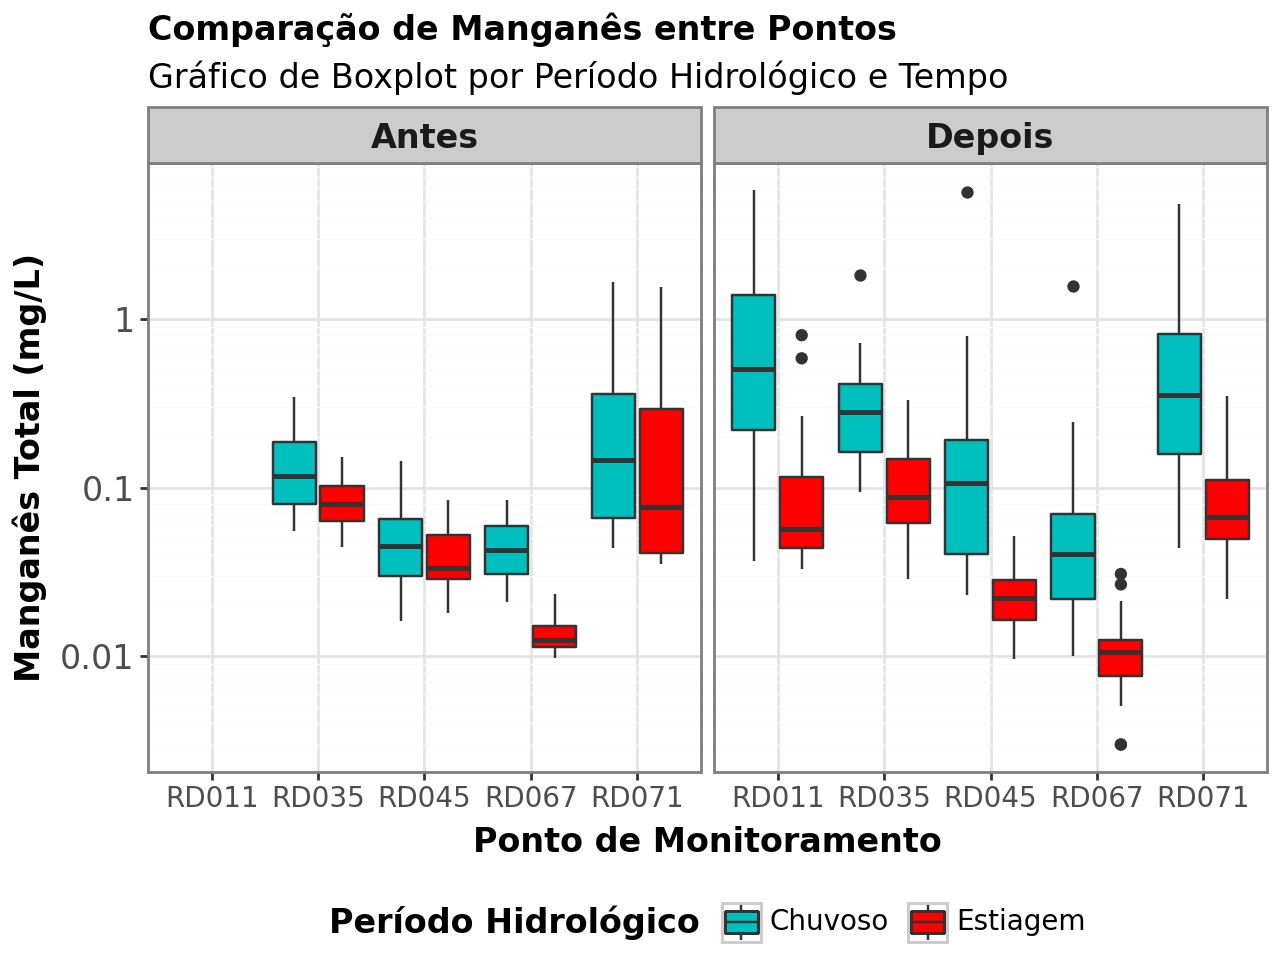

In [14]:
(ggplot(df, aes(x='ponto', y='manganes_total')) +
  geom_boxplot(aes(fill='periodo'), width = 0.9) +
  scale_y_log10() +
  scale_fill_manual(values={'Chuvoso': cor3, 'Estiagem': cor4}) +
 # scale_fill_manual(values={'Antes': cor1, 'Depois': cor2}) +
  facet_wrap('~rompimento') +
  labs(x='Ponto de Monitoramento',y='Manganês Total (mg/L)',
       title = 'Comparação de Manganês entre Pontos',
       subtitle = 'Gráfico de Boxplot por Período Hidrológico e Tempo',
       fill='Período Hidrológico') +
  theme_bw() +
  theme(legend_position='bottom',
        plot_title=element_text(size=12, face='bold'),
        plot_subtitle=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_text_x=element_text(size=10),
        axis_title=element_text(size=12, face='bold'),
        legend_title=element_text(size=12, face='bold'),
        legend_text=element_text(size=10),
        strip_text=element_text(size=12, face='bold')))

# Em R = plot.title | Em Python = plot_title

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 92 rows containing non-finite values.
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_summary : Removed 92 rows containing non-finite values.


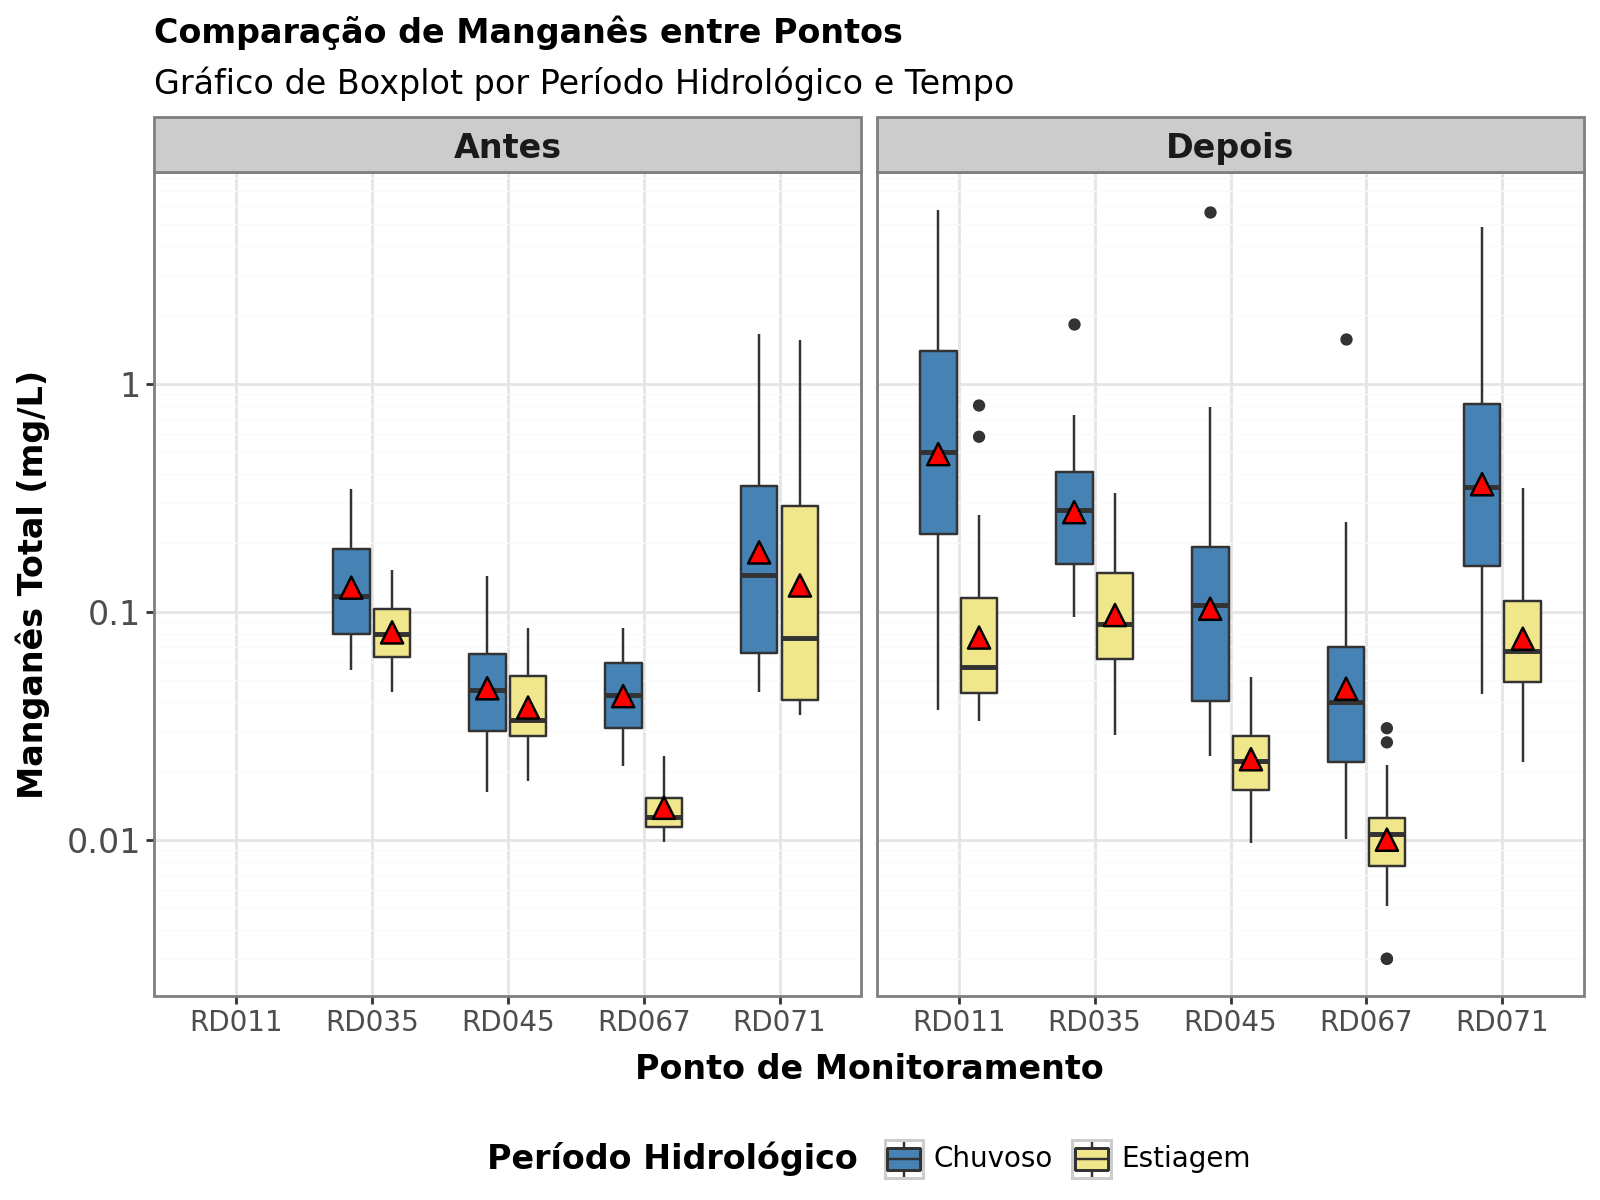

In [15]:
import numpy as np #Vamos precisar do numpy para calcular "mean"


# Redefinindo as cores
cor3 = to_hex('steelblue')
cor4 = to_hex('khaki')

(ggplot(df, aes(x='ponto', y='manganes_total')) +
 geom_boxplot(aes(fill='periodo'), width=0.6) +
 stat_summary(aes(group='periodo'), fun_y=np.mean, geom='point', size=4, shape='^', fill='r',
              position=position_dodge(width=0.6)) +
#  aqui temos uma diferença de sintaxe para o R. Primeiramente temos que utilziar a função mean do numpy
#  depois temos que nos ater a posição da sintaxe do stat_summary pelo Plotnine.
#  Em shapes as strings são diferentes: o = círculo; s = quadrado; ^ = triângulo; etc.
#  Novamente temos a questão das cores, no caso r = vermelho em fill
 scale_y_log10() +
 scale_fill_manual(values={'Chuvoso': cor3, 'Estiagem': cor4}) +
 theme(legend_position='none') +
 facet_wrap('~rompimento') +
 labs(x='Ponto de Monitoramento', y='Manganês Total (mg/L)',
      title='Comparação de Manganês entre Pontos',
      subtitle='Gráfico de Boxplot por Período Hidrológico e Tempo',
      fill='Período Hidrológico') +
 theme_bw() +
 theme(legend_position='bottom',
       plot_title=element_text(size=12, face='bold'),
       plot_subtitle=element_text(size=12),
       axis_text_y=element_text(size=12),
       axis_text_x=element_text(size=10),
       axis_title=element_text(size=12, face='bold'),
       legend_title=element_text(size=12, face='bold'),
       legend_text=element_text(size=10),
       strip_text=element_text(size=12, face='bold')) +
theme(figure_size=(8, 6))) #O código da última linha altera o tamanho do boxplot para melhor visualizar.